In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,MaxPooling2D,Dropout,Activation
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
import os
from PIL import Image

2023-05-15 04:56:33.608262: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Image Data Generator

In [2]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   rotation_range = 90,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   horizontal_flip=True)






train_generator = train_datagen.flow_from_directory('Flower_Classification/train',
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode='binary')







valid_datagen = ImageDataGenerator(rescale = 1./255)


valid_generator = valid_datagen.flow_from_directory('Flower_Classification/valid',
                                                   target_size=(224,224),
                                                   batch_size=32,
                                                   class_mode='binary')

Found 6375 images belonging to 2 classes.
Found 364 images belonging to 2 classes.


## Model Development 

In [3]:
resnet_model= tf.keras.applications.ResNet50(include_top=True,
                                             input_shape=(224,224,3),
                                             pooling='max',classes=1000,
                                             weights='imagenet'
                                            )

for layer in resnet_model.layers:
    layer.trainable=False

2023-05-15 04:58:06.179238: I tensorflow/core/platform/cpu_feature_guard.cc:194] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE3 SSE4.1 SSE4.2 AVX
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-15 04:58:06.511760: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1637] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15304 MB memory:  -> device: 0, name: Tesla P100-SXM2-16GB, pci bus id: 0000:06:00.0, compute capability: 6.0
2023-05-15 04:58:06.513086: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1637] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 15304 MB memory:  -> device: 1, name: Tesla P100-SXM2-16GB, pci bus id: 0000:84:00.0, compute capability: 6.0


In [4]:
resnet_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [5]:
model = Sequential()
model.add(resnet_model)
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(2, activation='softmax'))

In [6]:
# model.compile(optimizer ='adam' , loss='spa_categorical_crossentropy' , metrics=['acc'])


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss=SparseCategoricalCrossentropy(),
              metrics=['acc'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1000)              25636712  
                                                                 
 dense (Dense)               (None, 500)               500500    
                                                                 
 dropout (Dropout)           (None, 500)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 1002      
                                                                 
Total params: 26,138,214
Trainable params: 501,502
Non-trainable params: 25,636,712
_________________________________________________________________


In [8]:
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=valid_generator,
    validation_steps=len(valid_generator)
) 

Epoch 1/10


2023-05-15 04:58:28.080531: I tensorflow/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8700


200/200 [==============================] - 89s 421ms/step - loss: 0.6708 - acc: 0.5873 - val_loss: 0.6717 - val_acc: 0.5549
Epoch 2/10
200/200 [==============================] - 83s 414ms/step - loss: 0.6330 - acc: 0.6510 - val_loss: 0.6130 - val_acc: 0.6484
Epoch 3/10
200/200 [==============================] - 85s 425ms/step - loss: 0.5856 - acc: 0.7122 - val_loss: 0.5696 - val_acc: 0.7225
Epoch 4/10
200/200 [==============================] - 84s 417ms/step - loss: 0.5623 - acc: 0.7253 - val_loss: 0.5566 - val_acc: 0.7418
Epoch 5/10
200/200 [==============================] - 80s 397ms/step - loss: 0.5555 - acc: 0.7333 - val_loss: 0.5599 - val_acc: 0.7253
Epoch 6/10
200/200 [==============================] - 83s 417ms/step - loss: 0.5517 - acc: 0.7324 - val_loss: 0.5735 - val_acc: 0.7088
Epoch 7/10
200/200 [==============================] - 85s 423ms/step - loss: 0.5481 - acc: 0.7291 - val_loss: 0.5714 - val_acc: 0.7115
Epoch 8/10
200/200 [==============================] - 84s 422ms/st

In [ ]:
# Saving and Loading model

In [15]:
model.save('Model.h5')

saveModel = load_model('Model.h5')

1/1 [==============================] - 1s 1s/step
[[0.01498629 0.98501366]]


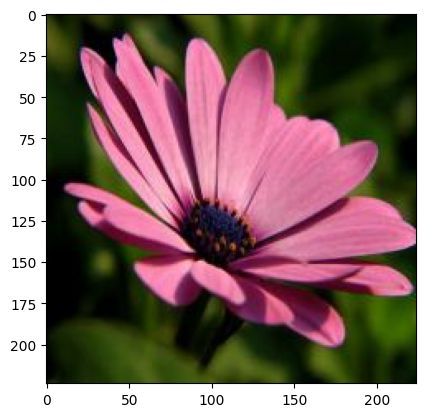

In [17]:
#Input image
test_image = image.load_img('Flower_Classification/test/daisy/1342002397_9503c97b49_jpg.rf.be4902de521032eed5de0f77d7788fe9.jpg',target_size=(224,224))

#For show image
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis=0)

# Result array
result = saveModel.predict(test_image)
print(result)

#Mapping result array with the main name list
i=0
for i in range(len(result[0])):
    if(result[0][i]==1):
        print(list_[i])
        break
